# Подготовка данных

## Первоначальный анализ и обработка

In [1]:
# Импорт и настройка пакетов
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

In [2]:
def nan_heatmap (dataFrame) :
    sns.heatmap(dataFrame.isna(), vmin=0, vmax=1)

In [3]:
# Чтение данных из датасетов
activityFrame = pd.read_csv("Data/Production/fourth_case_activity.csv")
demographicsFrame = pd.read_csv("Data/Production/fourth_case_demographics.csv")
purchaseFrame = pd.read_csv("Data/Production/fourth_case_purchase.csv")

Каждый из файлов содержит стобец с нумерацией. От него можно избавиться.

In [4]:
activityFrame = activityFrame.drop(activityFrame.columns[0], axis = 1)
demographicsFrame = demographicsFrame.drop(demographicsFrame.columns[0], axis = 1)
purchaseFrame = purchaseFrame.drop(purchaseFrame.columns[0], axis = 1)

In [5]:
print(activityFrame.shape)
print(purchaseFrame.shape)
print(demographicsFrame.shape)

(46149, 6)
(46149, 6)
(5886, 12)


На основе `shape` фреймов *Activity* и *Purchase*, а также визуального анализа, у меня есть подозрение, что они одинаковы. Сравним эти датафреймы

In [6]:
import pandas_diff as pd_diff

print(pd_diff.get_diffs(activityFrame, purchaseFrame, ['id', 'activity_type', 'activity_form', 'time', 'total_activity_quantity', 'remaining_activity_quantity']))

c:\Users\Kirill\Projects\Practice\.venv\Lib\site-packages\pandas_diff\pre_process.py:46: UserWarning: Found 6 duplicated rows in before dataframe: [{'id': '204cc4d3-0ea0-4efb', 'activity_type': 'Групповое занятие', 'activity_form': 'Бойцовский клуб', 'time': '2022-07-13T19:00:00', 'total_activity_quantity': 1, 'remaining_activity_quantity': 0}, {'id': '4d520950-b930-465d', 'activity_type': 'Групповое занятие', 'activity_form': 'Бойцовский клуб', 'time': '2022-07-13T19:00:00', 'total_activity_quantity': 1, 'remaining_activity_quantity': 0}, {'id': '204cc4d3-0ea0-4efb', 'activity_type': 'Групповое занятие', 'activity_form': 'Бойцовский клуб', 'time': '2022-07-13T19:00:00', 'total_activity_quantity': 1, 'remaining_activity_quantity': 0}, {'id': '4d520950-b930-465d', 'activity_type': 'Групповое занятие', 'activity_form': 'Бойцовский клуб', 'time': '2022-07-13T19:00:00', 'total_activity_quantity': 1, 'remaining_activity_quantity': 0}, {'id': '1ad875a4-0f50-422f', 'activity_type': 'Групповое

Empty DataFrame
Columns: []
Index: []


Датафреймы действительно оказались абсолютно одинаковы. Это значит, что от одного из них пока можно отказаться. Я решил работать дальше с датафреймом *Activity*.
Помимо этого в датафрейме были найдены дублирующиеся записи. Они были автоматически удалены.
Разберёмся с дубликатами в *Demographics*.

In [7]:
demographicsFrame.drop_duplicates(inplace=True)

Можем продолжать обработку.
Конвертируем информацию о дате и времени в датафреймах в нормальный вид.

In [8]:
activityFrame['time'] = pd.to_datetime(activityFrame['time'], errors='coerce')
demographicsFrame['saledate'] = pd.to_datetime(demographicsFrame['saledate'], errors='coerce')
demographicsFrame['enddate'] = pd.to_datetime(demographicsFrame['enddate'], errors='coerce')
demographicsFrame['birthday'] = pd.to_datetime(demographicsFrame['birthday'], errors='coerce')

## Поиск и замена пропусков в данных

Перейдём к пропускам в данных. Для оценки пропущеных значений (где их и сколько) построим `heatmap` пропусков.


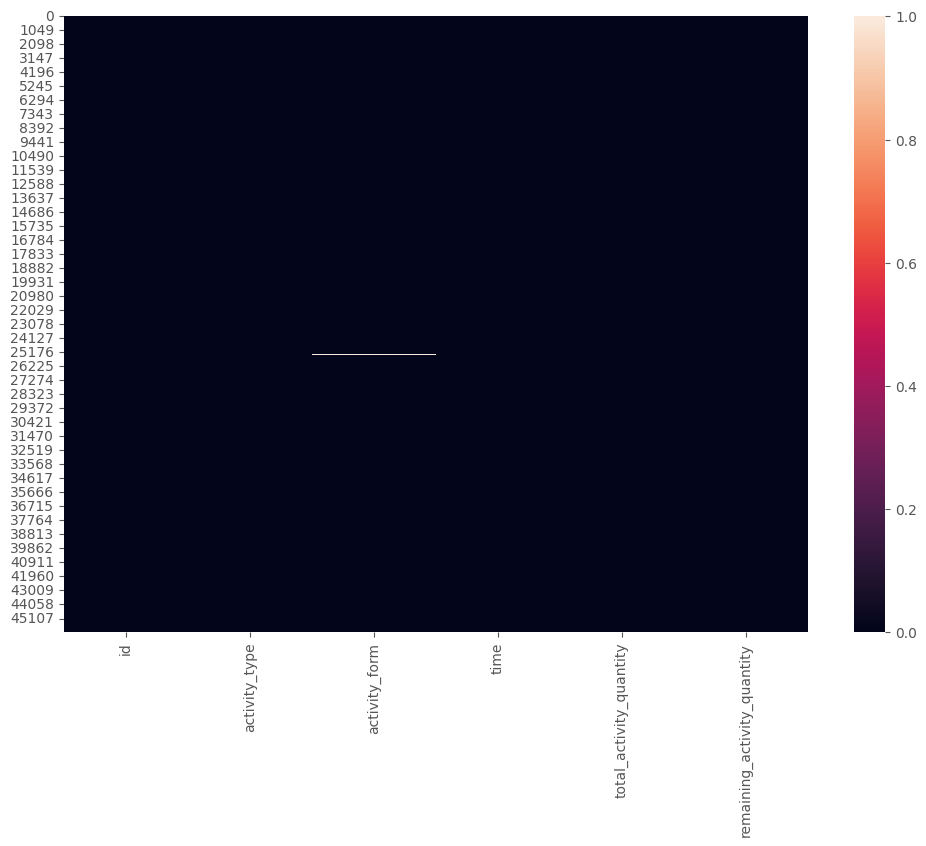

In [9]:
nan_heatmap(activityFrame)

В *Activity* видим пропуски в `activity_form`. Записей очень много, так что некоторые пропуски могут быть не видны на графике. Посмотрим записи с пропусками.

In [10]:
activityFrame[activityFrame.isna().any(axis=1)]

,id,activity_type,activity_form,time,total_activity_quantity,remaining_activity_quantity
18824,68c16b96-1daf-4d66,Персональное занятие,NaN,2022-09-15 18:00:00,1,0
20067,c4e307f8-5220-41fa,Персональное занятие,NaN,2022-09-05 18:00:00,1,0
25329,fcfa286c-af9f-40f8,Персональное занятие,NaN,2022-07-14 14:16:00,1,0
26592,acd7a0db-72b4-440c,Персональное занятие,NaN,2022-07-04 13:11:00,1,0
27312,f98ab495-0956-4b00,Персональное занятие,NaN,2022-06-27 14:29:00,1,0
27586,86efc865-00ad-40da,Персональное занятие,NaN,2022-06-24 16:26:00,1,0
27879,acd7a0db-72b4-440c,Персональное занятие,NaN,2022-06-22 09:07:00,1,0
28148,518c54b0-81e8-4daa,Персональное занятие,NaN,2022-06-20 20:10:00,1,0
29064,9e92a2ba-bf54-4e75,Персональное занятие,NaN,2022-06-12 12:49:00,1,0
29206,9bec576f-789e-4879,Персональное занятие,NaN,2022-06-10 16:41:00,1,0


Данных с пропусками много, во всех пропущена только `activity_form`. Чтобы не потерять данные, можем попробовать заполнить пропущенные значения модой.

In [11]:
activityFrame['activity_form'].mode() # Просматриваем, какая мода у этого признака

0    Тренажерный зал
Name: activity_form, dtype: object

In [12]:
activityFrame['activity_form'] = activityFrame['activity_form'].fillna(activityFrame['activity_form'].mode()[0])

Теперь посмотрим пропуски в *Demographics*.

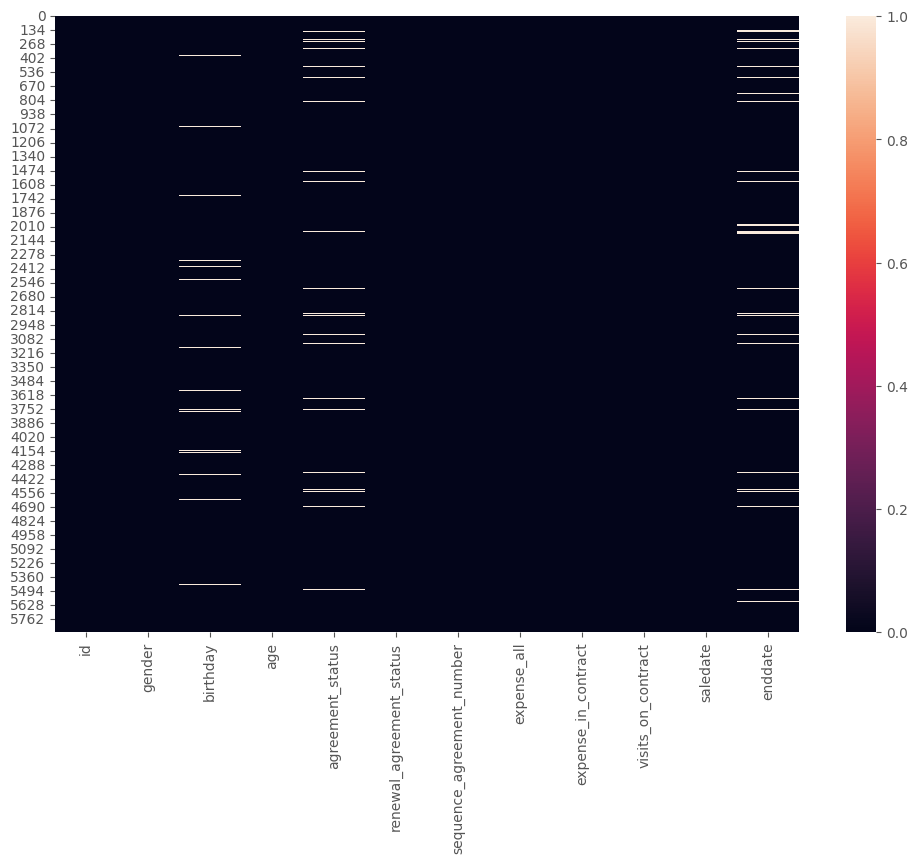

In [13]:
nan_heatmap(demographicsFrame)

Сразу видим пропуски в `birthday`, `agreement_status` и в `enddate`. Посмотрим записи с пропусками.

In [14]:
demographicsFrame[demographicsFrame.isna().any(axis=1)]

,id,gender,birthday,age,agreement_status,renewal_agreement_status,sequence_agreement_number,expense_all,expense_in_contract,visits_on_contract,saledate,enddate
15,7c2c8a8c-8133-4bbc,Мужской,1979-08-10,43,Продан,Не требует продления,0,356370.00,300000.0,0,2022-12-31 15:30:24,NaT
48,c4d5bc1a-dcae-4920,Женский,1982-12-01,40,NaN,Не продлено,0,8343.00,0.0,0,2022-12-30 17:36:28,NaT
63,e6638b90-7261-4e68,Женский,1995-08-11,27,NaN,Не продлено,0,126000.00,0.0,0,2022-12-30 14:51:08,NaT
82,0a4791d0-deec-4bc5,Женский,1963-12-30,59,NaN,Не продлено,0,196828.46,0.0,0,2022-12-30 09:55:23,NaT
90,036c2615-89f2-4094,Женский,NaT,0,Активен,Не продлено,1,15028.20,15028.2,46,2022-12-29 21:18:09,2024-01-01 23:59:59
...,...,...,...,...,...,...,...,...,...,...,...,...
5834,b8aa6922-4a08-47bf,Мужской,2009-07-21,13,NaN,Не продлено,0,63935.00,0.0,0,2022-01-09 13:34:05,NaT
5851,87c27424-b459-4521,Мужской,NaT,0,Закрыт,Не продлено,1,32500.00,32500.0,39,2022-01-08 15:01:39,2023-02-01 23:59:59
5854,7929bc7e-d5b7-44d7,Женский,NaT,0,Закрыт,Не продлено,1,25000.00,25000.0,21,2022-01-08 13:52:35,2023-01-06 23:59:59
5868,aae06796-86f9-468e,Женский,1972-04-09,51,Активен,Не требует продления,0,240000.00,240000.0,79,2022-01-05 12:57:33,NaT


Записей с пропусками в `birthday` довольно много и заполнять их на основе средних значений будет нецелесообразно. Так как в датасете присутствует признак `age`, от `birthday` можно избавиться.

In [15]:
demographicsFrame = demographicsFrame.drop(columns='birthday', axis=1)

Теперь перейдём к `enddate`. В нём достаточно много пропусков, но избаляться от него нельзя. Посмотрим, какой процент от общего количества записей имеет пропуск в дате окончания контракта.
Чтобы не терять данные, заменим пропуск в дате значением "Отсутствует"

In [16]:
demographicsFrame['enddate'] = demographicsFrame['enddate'].fillna("Отсутствует")

Теперь разберёмся с пропусками в `agreement_status`. Посмотрим на них отдельно.

In [17]:
demographicsFrame[demographicsFrame['agreement_status'].isna()]

,id,gender,age,agreement_status,renewal_agreement_status,sequence_agreement_number,expense_all,expense_in_contract,visits_on_contract,saledate,enddate
48,c4d5bc1a-dcae-4920,Женский,40,NaN,Не продлено,0,8343.00,0.0,0,2022-12-30 17:36:28,Отсутствует
63,e6638b90-7261-4e68,Женский,27,NaN,Не продлено,0,126000.00,0.0,0,2022-12-30 14:51:08,Отсутствует
82,0a4791d0-deec-4bc5,Женский,59,NaN,Не продлено,0,196828.46,0.0,0,2022-12-30 09:55:23,Отсутствует
127,1fbaa490-bf7b-427f,Женский,65,NaN,Не продлено,0,178447.48,0.0,0,2022-12-29 11:55:20,Отсутствует
130,38b79edc-135b-42a5,Мужской,46,NaN,Не продлено,0,31855.99,0.0,0,2022-12-29 11:03:30,Отсутствует
...,...,...,...,...,...,...,...,...,...,...,...
5520,f245f077-390e-4b5c,Женский,38,NaN,Не продлено,0,0.00,0.0,0,2022-01-30 17:50:42,Отсутствует
5541,742c544e-f409-4c0a,Мужской,44,NaN,Не продлено,0,71566.68,0.0,0,2022-01-30 13:09:42,Отсутствует
5727,c0439d37-c718-4d8e,Женский,7,NaN,Не продлено,0,126500.00,0.0,0,2022-01-15 18:01:16,Отсутствует
5816,3af4d880-4bb5-4612,Женский,28,NaN,Не продлено,0,16500.00,0.0,0,2022-01-10 00:00:00,Отсутствует


Что видим? Статус продления всегда "Не продлено", а `sequence_agreement_number` всегда 0. Возможно это побочный эффект нулевого `sequence_agreement_number`. Проверим это, просмотрев все записи с такими свойствами.

In [18]:
demographicsFrame[demographicsFrame['sequence_agreement_number'] == 0].head()

,id,gender,age,agreement_status,renewal_agreement_status,sequence_agreement_number,expense_all,expense_in_contract,visits_on_contract,saledate,enddate
15,7c2c8a8c-8133-4bbc,Мужской,43,Продан,Не требует продления,0,356370.00,300000.0,0,2022-12-31 15:30:24,Отсутствует
48,c4d5bc1a-dcae-4920,Женский,40,NaN,Не продлено,0,8343.00,0.0,0,2022-12-30 17:36:28,Отсутствует
63,e6638b90-7261-4e68,Женский,27,NaN,Не продлено,0,126000.00,0.0,0,2022-12-30 14:51:08,Отсутствует
82,0a4791d0-deec-4bc5,Женский,59,NaN,Не продлено,0,196828.46,0.0,0,2022-12-30 09:55:23,Отсутствует
105,6d1bea2d-1fde-4076,Женский,57,Активен,Не требует продления,0,179380.00,0.0,7,2022-12-29 18:13:00,Отсутствует


Уже видим, что гипотеза оказалась неверна. Посмотрим, что с записями с нулевым `sequence_agreement_number`, но не пропущенным `agreement_status`.

In [19]:
demographicsFrame[(demographicsFrame['sequence_agreement_number'] == 0) & (demographicsFrame['agreement_status'].isna() == False)]

,id,gender,age,agreement_status,renewal_agreement_status,sequence_agreement_number,expense_all,expense_in_contract,visits_on_contract,saledate,enddate
15,7c2c8a8c-8133-4bbc,Мужской,43,Продан,Не требует продления,0,356370.00,300000.0,0,2022-12-31 15:30:24,Отсутствует
105,6d1bea2d-1fde-4076,Женский,57,Активен,Не требует продления,0,179380.00,0.0,7,2022-12-29 18:13:00,Отсутствует
135,6de525d7-a5a4-4bd2,Женский,37,Продан,Не требует продления,0,300000.00,300000.0,0,2022-12-28 20:44:22,Отсутствует
376,dd31fb37-dc2b-4a80,Женский,7,Продан,Не требует продления,0,266500.00,240000.0,0,2022-12-14 12:21:52,Отсутствует
377,8061ba47-d75b-4f83,Мужской,33,Продан,Не требует продления,0,83400.00,0.0,0,2022-12-14 11:42:45,Отсутствует
408,63b2d533-69f9-4a33,Мужской,20,Активен,Не требует продления,0,0.00,0.0,7,2022-12-12 11:28:59,Отсутствует
626,df365809-0d16-47fd,Мужской,47,Активен,Не требует продления,0,267500.00,240000.0,2,2022-11-28 17:27:54,Отсутствует
641,2d29b80f-929c-436c,Мужской,26,Продан,Не требует продления,0,380100.00,240000.0,0,2022-11-28 12:24:12,Отсутствует
667,756957a3-ac6b-4630,Мужской,37,Активен,Не требует продления,0,261753.88,240000.0,65,2022-11-27 12:29:46,Отсутствует
737,74b60fdc-33b9-4c96,Мужской,41,Продан,Не требует продления,0,600000.00,300000.0,0,2022-11-25 16:10:17,Отсутствует


Как видим, у всех записей `renewal_agreement_status` - "Не требует продления". В записях с пропусками, как мы видим, ситуация другая - так `renewal_agreement_status` - "Не продлено". Может быть, не продлённые контаркты с нулевым `sequence_agreement_number` - это всё и есть данные с нашими пропусками.

In [20]:
demographicsFrame[(demographicsFrame['sequence_agreement_number'] == 0) & (demographicsFrame['renewal_agreement_status'] == "Не продлено")]

,id,gender,age,agreement_status,renewal_agreement_status,sequence_agreement_number,expense_all,expense_in_contract,visits_on_contract,saledate,enddate
48,c4d5bc1a-dcae-4920,Женский,40,NaN,Не продлено,0,8343.00,0.0,0,2022-12-30 17:36:28,Отсутствует
63,e6638b90-7261-4e68,Женский,27,NaN,Не продлено,0,126000.00,0.0,0,2022-12-30 14:51:08,Отсутствует
82,0a4791d0-deec-4bc5,Женский,59,NaN,Не продлено,0,196828.46,0.0,0,2022-12-30 09:55:23,Отсутствует
127,1fbaa490-bf7b-427f,Женский,65,NaN,Не продлено,0,178447.48,0.0,0,2022-12-29 11:55:20,Отсутствует
130,38b79edc-135b-42a5,Мужской,46,NaN,Не продлено,0,31855.99,0.0,0,2022-12-29 11:03:30,Отсутствует
...,...,...,...,...,...,...,...,...,...,...,...
5520,f245f077-390e-4b5c,Женский,38,NaN,Не продлено,0,0.00,0.0,0,2022-01-30 17:50:42,Отсутствует
5541,742c544e-f409-4c0a,Мужской,44,NaN,Не продлено,0,71566.68,0.0,0,2022-01-30 13:09:42,Отсутствует
5727,c0439d37-c718-4d8e,Женский,7,NaN,Не продлено,0,126500.00,0.0,0,2022-01-15 18:01:16,Отсутствует
5816,3af4d880-4bb5-4612,Женский,28,NaN,Не продлено,0,16500.00,0.0,0,2022-01-10 00:00:00,Отсутствует


Действительно, пропуски в `agreement_status` характерны для записей с нулевым `sequence_agreement_number` и не продлённым контрактом. Методом ~~тыка~~ эксперимента было обнаружено, что у записей с пропуском в `agreement_status` есть дубликаты по `id`, в которых уже пропусков нет. На основе этой информации я сделал вывод, что от записей с пропуском в `agreement_status` можно избавиться.

In [21]:
demographicsFrame = demographicsFrame[demographicsFrame['agreement_status'].isna() == False]

С самым страшным в пропусках разобрались. Посмотрим, вдруг остались ещё пропуски?

In [22]:
demographicsFrame[demographicsFrame.isna().any(axis=1)]

,id,gender,age,agreement_status,renewal_agreement_status,sequence_agreement_number,expense_all,expense_in_contract,visits_on_contract,saledate,enddate
2298,7240246c-618b-4b9f,NaN,23,Активен,Не продлено,1,19988.29,19988.29,12,2022-08-17 19:25:53,2023-09-03 23:59:59


Как видим, да. К счастью, всего один. Заполним его модой `gender`

In [23]:
demographicsFrame['gender'] = demographicsFrame['gender'].fillna(demographicsFrame['gender'].mode()[0])

## Поиск и обработка выбросов

Отлично, пропусков в данных больше нет. Можем продолжать обработку.
Посмотрим, с какими столбцами и типами данных мы работаем

In [24]:
activityFrame.dtypes

id                                     object
activity_type                          object
activity_form                          object
time                           datetime64[ns]
total_activity_quantity                 int64
remaining_activity_quantity             int64
dtype: object

In [25]:
demographicsFrame.dtypes

id                                   object
gender                               object
age                                   int64
agreement_status                     object
renewal_agreement_status             object
sequence_agreement_number             int64
expense_all                         float64
expense_in_contract                 float64
visits_on_contract                    int64
saledate                     datetime64[ns]
enddate                              object
dtype: object

Начнём разбираться с нетипичными данными. Используем для этого `boxplot`. Для начала посмотрим, какие столбцы можно поместить на один график и значения всё ещё будут читаемы

In [26]:
print(activityFrame['total_activity_quantity'].describe())
print(activityFrame['remaining_activity_quantity'].describe())

count    46149.000000
mean         4.848967
std          6.935473
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max        234.000000
Name: total_activity_quantity, dtype: float64
count    46149.000000
mean         0.257969
std          4.373752
min        -26.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        167.000000
Name: remaining_activity_quantity, dtype: float64


Как видно из `max`, столбцы из *Activity* можем спокойно уместить на один `boxplot`. Это и сделаем

<Axes: >

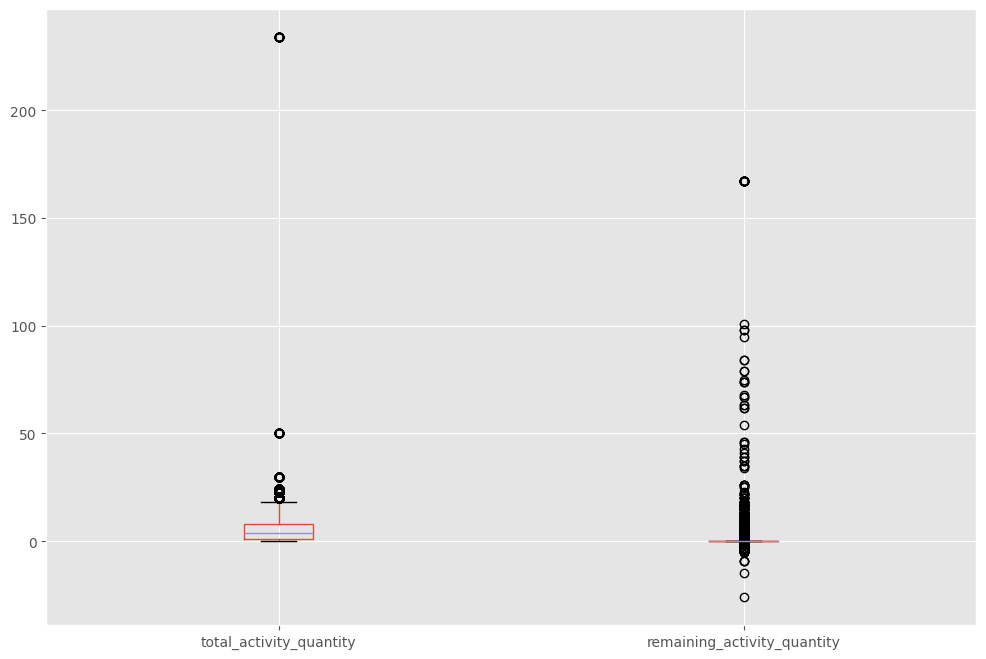

In [27]:
activityFrame.boxplot(column=['total_activity_quantity', 'remaining_activity_quantity'])

Есть несколько подозрительных записей, сильно выбивающихся от общей массы. Посмотрим, что с ними.

In [28]:
activityFrame[activityFrame['total_activity_quantity'] > 200]

,id,activity_type,activity_form,time,total_activity_quantity,remaining_activity_quantity
5787,a5fc540a-daa9-480f,Групповое занятие,Детский центр,2022-11-28 20:00:00,234,167
6878,a5fc540a-daa9-480f,Групповое занятие,Детский центр,2022-11-22 18:00:00,234,167
7162,a5fc540a-daa9-480f,Групповое занятие,Детский центр,2022-11-21 20:00:00,234,167
8437,a5fc540a-daa9-480f,Групповое занятие,Детский центр,2022-11-14 20:00:00,234,167
18873,a5fc540a-daa9-480f,Групповое занятие,Детский центр,2022-09-13 15:00:00,234,167
19768,a5fc540a-daa9-480f,Групповое занятие,Детский центр,2022-09-06 18:00:00,234,167
31702,a5fc540a-daa9-480f,Групповое занятие,Детский центр,2022-05-20 19:15:00,234,167
31869,a5fc540a-daa9-480f,Групповое занятие,Детский центр,2022-05-19 19:00:00,234,167
33987,a5fc540a-daa9-480f,Групповое занятие,Детский центр,2022-04-28 19:00:00,234,167
34341,a5fc540a-daa9-480f,Групповое занятие,Детский центр,2022-04-25 18:00:00,234,167


In [29]:
activityFrame[activityFrame['remaining_activity_quantity'] > 150]

,id,activity_type,activity_form,time,total_activity_quantity,remaining_activity_quantity
5787,a5fc540a-daa9-480f,Групповое занятие,Детский центр,2022-11-28 20:00:00,234,167
6878,a5fc540a-daa9-480f,Групповое занятие,Детский центр,2022-11-22 18:00:00,234,167
7162,a5fc540a-daa9-480f,Групповое занятие,Детский центр,2022-11-21 20:00:00,234,167
8437,a5fc540a-daa9-480f,Групповое занятие,Детский центр,2022-11-14 20:00:00,234,167
18873,a5fc540a-daa9-480f,Групповое занятие,Детский центр,2022-09-13 15:00:00,234,167
19768,a5fc540a-daa9-480f,Групповое занятие,Детский центр,2022-09-06 18:00:00,234,167
31702,a5fc540a-daa9-480f,Групповое занятие,Детский центр,2022-05-20 19:15:00,234,167
31869,a5fc540a-daa9-480f,Групповое занятие,Детский центр,2022-05-19 19:00:00,234,167
33987,a5fc540a-daa9-480f,Групповое занятие,Детский центр,2022-04-28 19:00:00,234,167
34341,a5fc540a-daa9-480f,Групповое занятие,Детский центр,2022-04-25 18:00:00,234,167


Какой, однако, активный пользователь. Хоть такое количество активностей и может быть реалистично, но из общей массы этот пользователь слишком сильно выбивается. Эти записи стоит удалить как выброс.

In [30]:
activityFrame = activityFrame[activityFrame['total_activity_quantity'] < 200]

In [31]:
activityFrame[activityFrame['remaining_activity_quantity'] < 0].describe()

,time,total_activity_quantity,remaining_activity_quantity
count,238,238.000000,238.000000
mean,2022-04-24 18:06:06.302521088,4.613445,-2.000000
min,2022-01-03 12:00:00,1.000000,-26.000000
25%,2022-03-01 01:30:00,1.000000,-2.000000
50%,2022-03-31 18:30:00,4.000000,-1.000000
75%,2022-06-10 06:41:15,8.000000,-1.000000
max,2022-12-30 10:30:00,16.000000,-1.000000
std,NaN,3.577023,2.274422


Есть странное значение, сильно выбивающееся на фоне остальных, у которого `remaining_activity_quantity` равно -26. Выглядит странно, так что избавимся от записи с этим значением.

In [32]:
activityFrame = activityFrame[activityFrame['remaining_activity_quantity'] != -26]

Теперь перейдём к *Demographics*. Cделаем `describe` для каждого числового столбца

In [33]:
print(demographicsFrame['age'].describe())
print(demographicsFrame['sequence_agreement_number'].describe())
print(demographicsFrame['expense_all'].describe())
print(demographicsFrame['expense_in_contract'].describe())
print(demographicsFrame['visits_on_contract'].describe())

count    5674.000000
mean       35.688932
std        17.347467
min         0.000000
25%        24.000000
50%        36.000000
75%        47.000000
max       105.000000
Name: age, dtype: float64
count    5674.000000
mean        2.523793
std         1.904714
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        19.000000
Name: sequence_agreement_number, dtype: float64
count      5674.000000
mean      59774.536454
std       61514.976724
min      -27404.880000
25%       20586.510000
50%       39000.000000
75%       80482.960000
max      705200.000000
Name: expense_all, dtype: float64
count      5674.000000
mean      20877.759339
std       30818.157118
min      -42312.350000
25%        8070.705000
50%       18577.980000
75%       25822.230000
max      650000.000000
Name: expense_in_contract, dtype: float64
count    5674.000000
mean       34.951886
std        47.251990
min         0.000000
25%         8.000000
50%        23.000000
75%        47.000000

Разместить данные на одном boxplot в данном случае не получится. Сделаем это раздельно.

<Axes: >

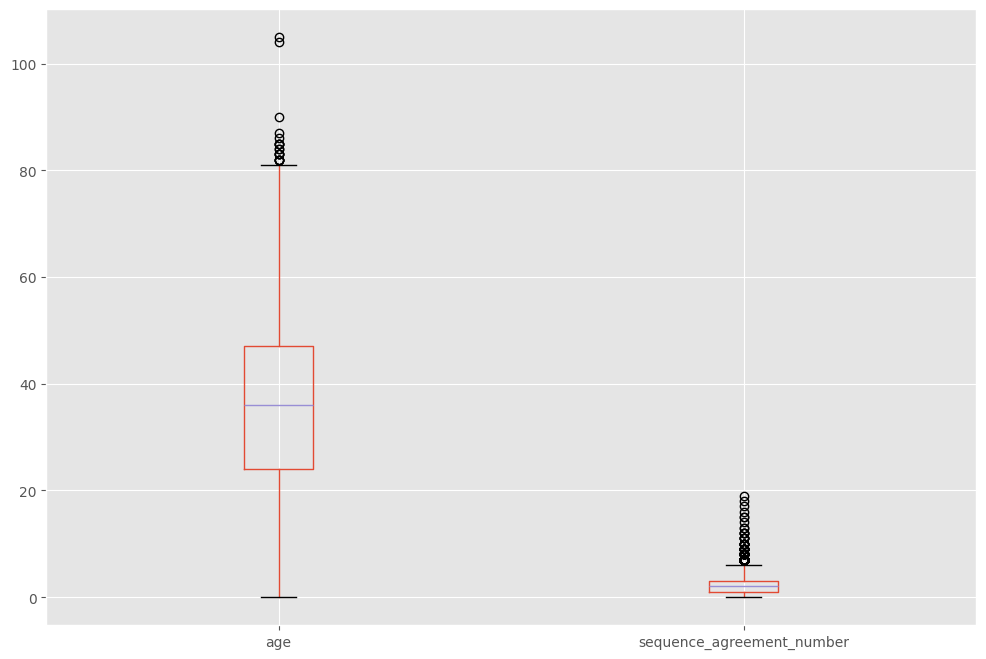

In [34]:
demographicsFrame.boxplot(column=['age', 'sequence_agreement_number'])

<Axes: >

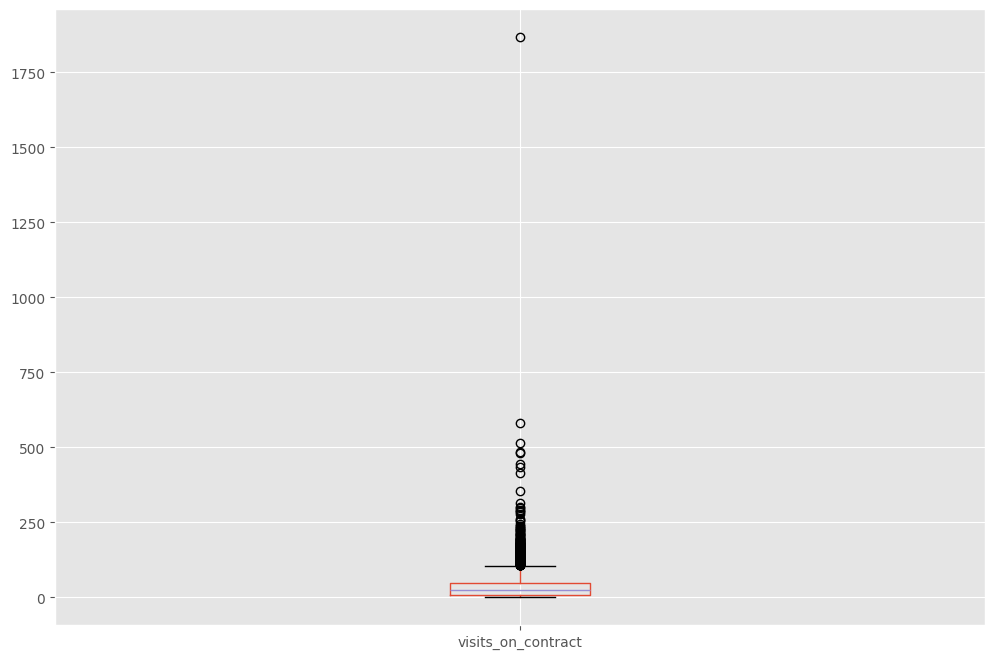

In [35]:
demographicsFrame.boxplot(column=['visits_on_contract'])

<Axes: >

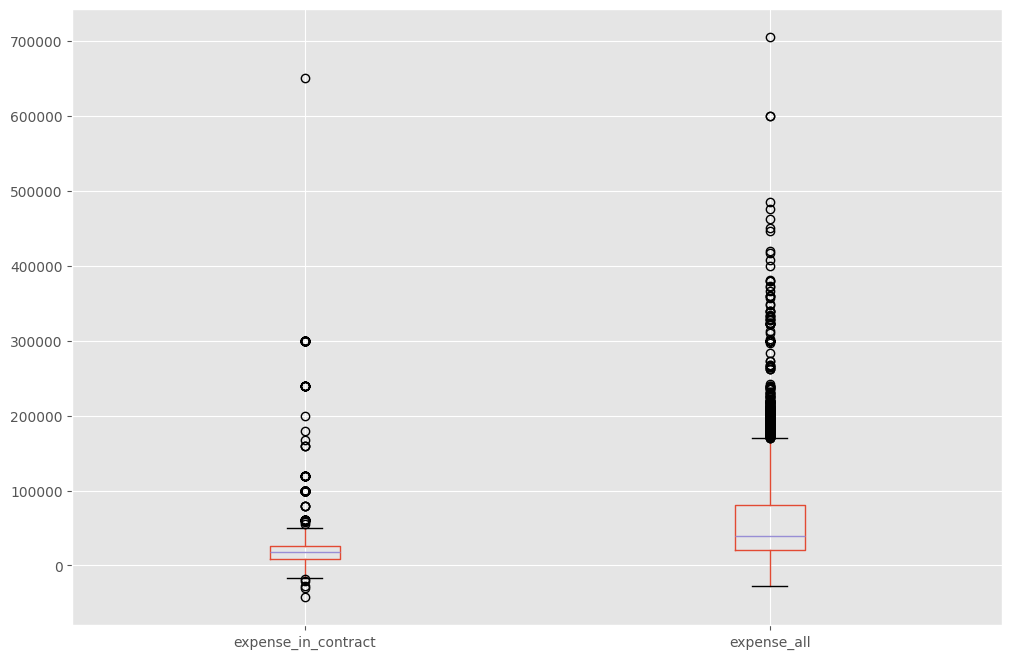

In [36]:
demographicsFrame.boxplot(column=['expense_in_contract', 'expense_all'])

Тут и там видим сильно выбивающиеся значения (особенно в `visits_on_contract`).

In [37]:
demographicsFrame.columns

Index(['id', 'gender', 'age', 'agreement_status', 'renewal_agreement_status',
       'sequence_agreement_number', 'expense_all', 'expense_in_contract',
       'visits_on_contract', 'saledate', 'enddate'],
      dtype='object')

Теперь перейдём к очистке от выбросов. В первую очередь будем использовать функцию ниже. Она позволит избавиться от так называемых "extreme outliers", что позволит эффективно избавиться от очевидных выбросов.

In [38]:
def remove_extreme_outliers(dataframe : pd.DataFrame, feature):
    fq = dataframe[feature].describe()['25%']
    tq = dataframe[feature].describe()['75%']
    iqr = tq - fq
    return dataframe[(dataframe[feature] > (fq - 3 * iqr)) & (dataframe[feature] < (tq + 3 * iqr))]

Применим эту функцию для каждого из числовых признаков.

In [39]:
print(demographicsFrame.dtypes)
print(demographicsFrame.shape)
demographicsFrame = remove_extreme_outliers(demographicsFrame, 'expense_all')
demographicsFrame = remove_extreme_outliers(demographicsFrame, 'expense_in_contract')
demographicsFrame = remove_extreme_outliers(demographicsFrame, 'visits_on_contract')
print(demographicsFrame.shape)

id                                   object
gender                               object
age                                   int64
agreement_status                     object
renewal_agreement_status             object
sequence_agreement_number             int64
expense_all                         float64
expense_in_contract                 float64
visits_on_contract                    int64
saledate                     datetime64[ns]
enddate                              object
dtype: object
(5674, 11)
(5427, 11)


## Создание признаков

Самое очевидное, что мы можем добавить - это возрастные группы клиентов в *Demographics*.

In [40]:
age_groups = ["Младенец", "Дошкольник", "Ребёнок", "Подросток", "Молодой", "Взрослый", "Пожилой"]
age_boundaries = [0, 1, 7, 11, 17, 27, 65, 120]
demographicsFrame["age_group"] = pd.cut(demographicsFrame['age'], age_boundaries, labels=age_groups)

В остальном, выявить какие-либо новые признаки на основе имеющихся данных довольно тяжело, так что перейдём дальше

## Кодирование признаков

Начнём кодирование данных. Начнём с дат. Ранее мы заменили пропуски в данных в *Demographics* на "Отсутствует". Посмотрим, сколько таких записей сейчас.

In [41]:
demographicsFrame[demographicsFrame['enddate'] == 'Отсутствует'].__len__()

9

После всех очисток и заполнений осталось всего 9 записей с "плохой" датой. Ничего страшного не случится, если их удалить (другого способа я не вижу, такой пропуск очень тяжело интерпретировать).

In [42]:
demographicsFrame = demographicsFrame[demographicsFrame['enddate'] != 'Отсутствует']
demographicsFrame['enddate'] = pd.to_datetime(demographicsFrame['enddate'])

Теперь конвертируем время в числовой формат. Для этого попробуем разбить каждую из дат на составляющие.

In [43]:
demographicsFrame['sale_year'] = demographicsFrame['saledate'].dt.year
demographicsFrame['sale_month'] = demographicsFrame['saledate'].dt.month
demographicsFrame['sale_day'] = demographicsFrame['saledate'].dt.day
demographicsFrame['sale_hour'] = demographicsFrame['saledate'].dt.hour
demographicsFrame['sale_minute'] = demographicsFrame['saledate'].dt.minute
demographicsFrame['sale_second'] = demographicsFrame['saledate'].dt.second

demographicsFrame['end_year'] = demographicsFrame['enddate'].dt.year
demographicsFrame['end_month'] = demographicsFrame['enddate'].dt.month
demographicsFrame['end_day'] = demographicsFrame['enddate'].dt.day
demographicsFrame['end_hour'] = demographicsFrame['enddate'].dt.hour
demographicsFrame['end_minute'] = demographicsFrame['enddate'].dt.minute
demographicsFrame['end_second'] = demographicsFrame['enddate'].dt.second

activityFrame['year'] = activityFrame['time'].dt.year
activityFrame['month'] = activityFrame['time'].dt.month
activityFrame['day'] = activityFrame['time'].dt.day
activityFrame['hour'] = activityFrame['time'].dt.hour
activityFrame['minute'] = activityFrame['time'].dt.minute
activityFrame['second'] = activityFrame['time'].dt.second

demographicsFrame = demographicsFrame.drop(columns='saledate', axis=1)
demographicsFrame = demographicsFrame.drop(columns='enddate', axis=1)
activityFrame = activityFrame.drop(columns='time', axis=1)

Теперь возьмёмся за категориальные признаки. Посмотрим, какие значения могут быть у признаков в наших датафреймах.

In [44]:
activityFrame.columns

Index(['id', 'activity_type', 'activity_form', 'total_activity_quantity',
       'remaining_activity_quantity', 'year', 'month', 'day', 'hour', 'minute',
       'second'],
      dtype='object')

In [45]:
# Вывод категорий в категориальных признаках Activity
print(activityFrame['activity_type'].unique())
print(activityFrame['activity_form'].unique())

['Групповое занятие' 'Персональное занятие']
['Бассейн' 'Групповые программы' 'Массаж' 'Тренажерный зал'
 'Детский центр' 'Бойцовский клуб' 'Физиологическое тестирование'
 'Мероприятия ФД' 'Массаж (Салон)']


In [46]:
demographicsFrame.columns

Index(['id', 'gender', 'age', 'agreement_status', 'renewal_agreement_status',
       'sequence_agreement_number', 'expense_all', 'expense_in_contract',
       'visits_on_contract', 'age_group', 'sale_year', 'sale_month',
       'sale_day', 'sale_hour', 'sale_minute', 'sale_second', 'end_year',
       'end_month', 'end_day', 'end_hour', 'end_minute', 'end_second'],
      dtype='object')

In [47]:
# Вывод категорий в категориальных признаках Demographics
print(demographicsFrame['agreement_status'].unique())
print(demographicsFrame['renewal_agreement_status'].unique())
print(demographicsFrame['gender'].unique())

['Активен' 'Продан' 'Заморожен' 'Закрыт' 'Заблокирован']
['Не продлено' 'Продлено' 'Отказ от продления']
['Мужской' 'Женский']


Для кодирования категориальных признаков будем использовать метод OHE (One-Hot Encoding). Закодировать признаки этим методом можно с помощью функции `get_dummies`.

In [48]:
typedummies = pd.get_dummies(activityFrame['activity_type'], prefix='type')
activityFrame = activityFrame.join(typedummies)
activityFrame = activityFrame.drop(columns='activity_type')

In [49]:
formdummies = pd.get_dummies(activityFrame['activity_form'], prefix='form')
activityFrame = activityFrame.join(formdummies)
activityFrame = activityFrame.drop(columns='activity_form')

In [50]:
genderdummies = pd.get_dummies(demographicsFrame['gender'], prefix='gender')
demographicsFrame = demographicsFrame.join(genderdummies)
demographicsFrame = demographicsFrame.drop(columns='gender', axis=1)

In [51]:
agreementdummies = pd.get_dummies(demographicsFrame['agreement_status'], prefix='agreement')
demographicsFrame = demographicsFrame.join(agreementdummies)
demographicsFrame = demographicsFrame.drop(columns='agreement_status', axis=1)

In [52]:
renewaldummies = pd.get_dummies(demographicsFrame['renewal_agreement_status'], prefix='renewal')
demographicsFrame = demographicsFrame.join(renewaldummies)
demographicsFrame = demographicsFrame.drop(columns='renewal_agreement_status', axis=1)

In [53]:
agegroupdummies = pd.get_dummies(demographicsFrame['age_group'], prefix='age_group')
demographicsFrame = demographicsFrame.join(agegroupdummies)
demographicsFrame = demographicsFrame.drop(columns='age_group', axis=1)

Посмотрим, какие теперь признаки в наших датасетах.

In [54]:
demographicsFrame.columns

Index(['id', 'age', 'sequence_agreement_number', 'expense_all',
       'expense_in_contract', 'visits_on_contract', 'sale_year', 'sale_month',
       'sale_day', 'sale_hour', 'sale_minute', 'sale_second', 'end_year',
       'end_month', 'end_day', 'end_hour', 'end_minute', 'end_second',
       'gender_Женский', 'gender_Мужской', 'agreement_Активен',
       'agreement_Заблокирован', 'agreement_Закрыт', 'agreement_Заморожен',
       'agreement_Продан', 'renewal_Не продлено', 'renewal_Отказ от продления',
       'renewal_Продлено', 'age_group_Младенец', 'age_group_Дошкольник',
       'age_group_Ребёнок', 'age_group_Подросток', 'age_group_Молодой',
       'age_group_Взрослый', 'age_group_Пожилой'],
      dtype='object')

In [55]:
activityFrame.columns

Index(['id', 'total_activity_quantity', 'remaining_activity_quantity', 'year',
       'month', 'day', 'hour', 'minute', 'second', 'type_Групповое занятие',
       'type_Персональное занятие', 'form_Бассейн', 'form_Бойцовский клуб',
       'form_Групповые программы', 'form_Детский центр', 'form_Массаж',
       'form_Массаж (Салон)', 'form_Мероприятия ФД', 'form_Тренажерный зал',
       'form_Физиологическое тестирование'],
      dtype='object')

## Проверка на корреллированность

Для проверки на коррелированность будем использовать `Heatmap` из Seaborn.

<Axes: >

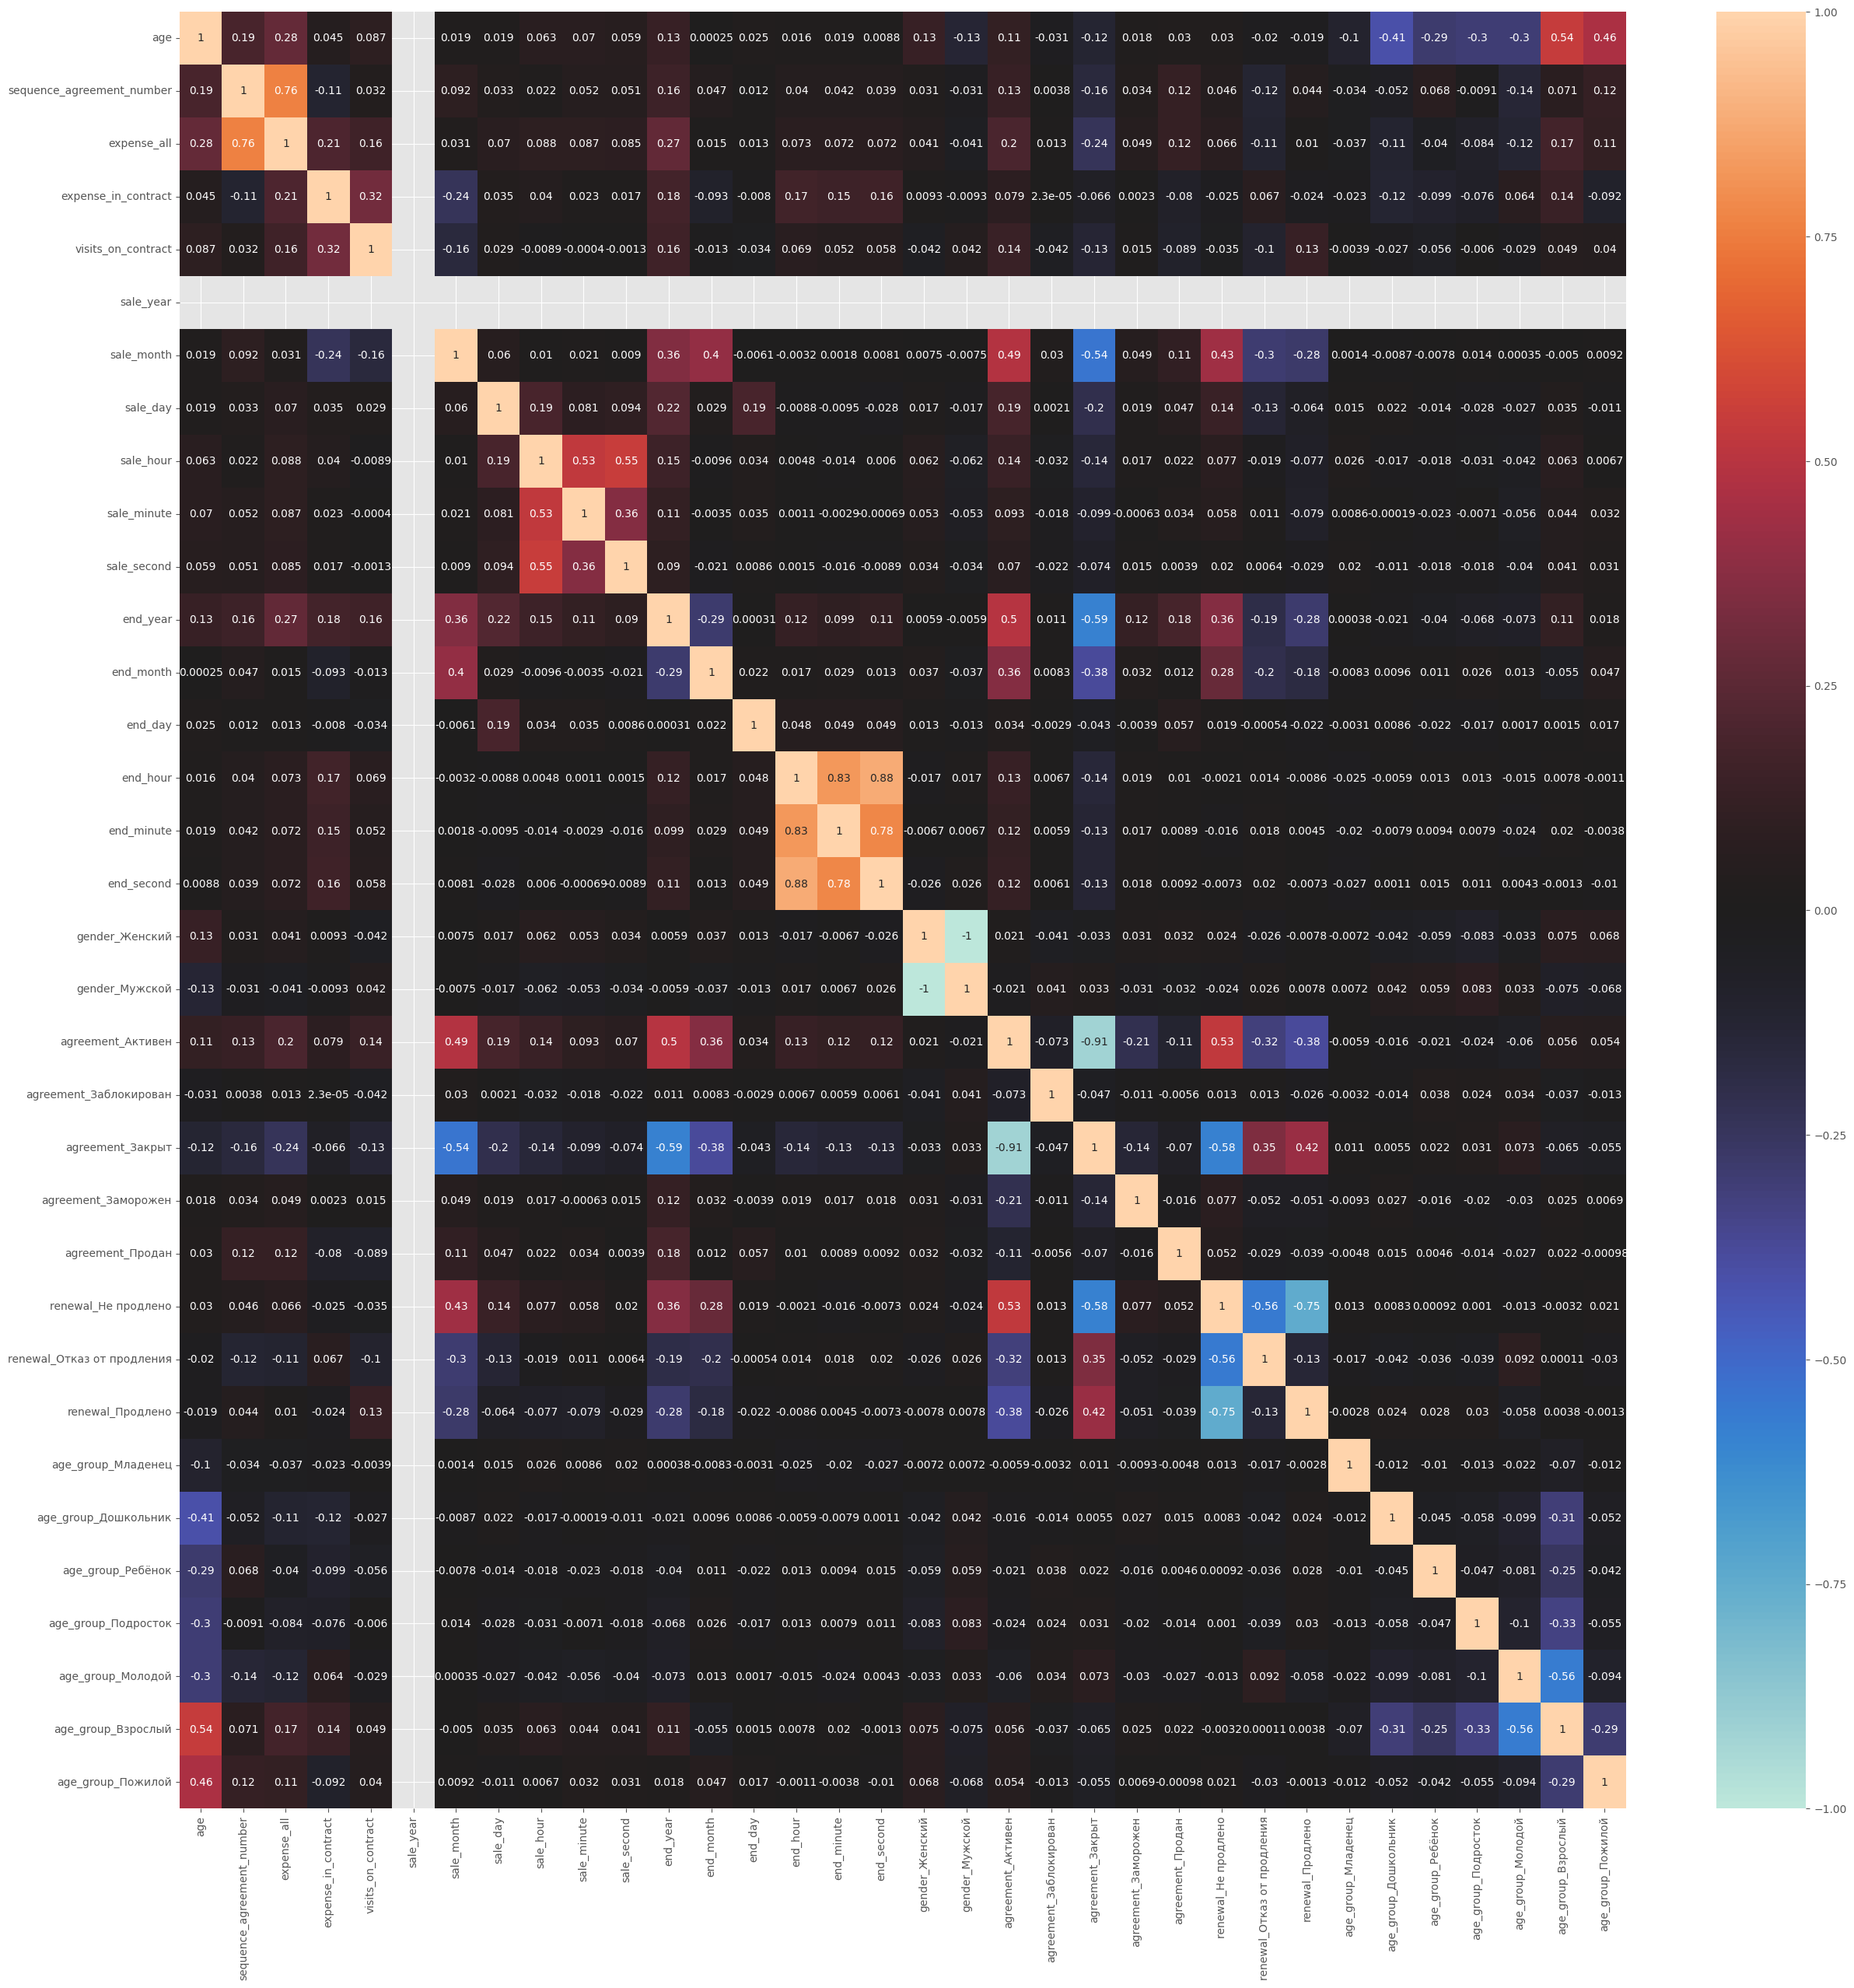

In [56]:
plt.figure(figsize=(30, 30))
sns.heatmap(demographicsFrame.drop('id', axis=1).corr(), annot=True, center=0)

Видим `Heatmap` коррелированности признаков. За пороговое значение возьмём 0.9. Под такое значение коррелированности попадают признаки `gender_Женский` и `agreement_Активен`. Удалим эти признаки.

In [57]:
demographicsFrame = demographicsFrame.drop(columns=['gender_Женский', 'agreement_Активен'], axis=1)

Теперь проведём аналогичную процедуру с датасетом *Activity*.

<Axes: >

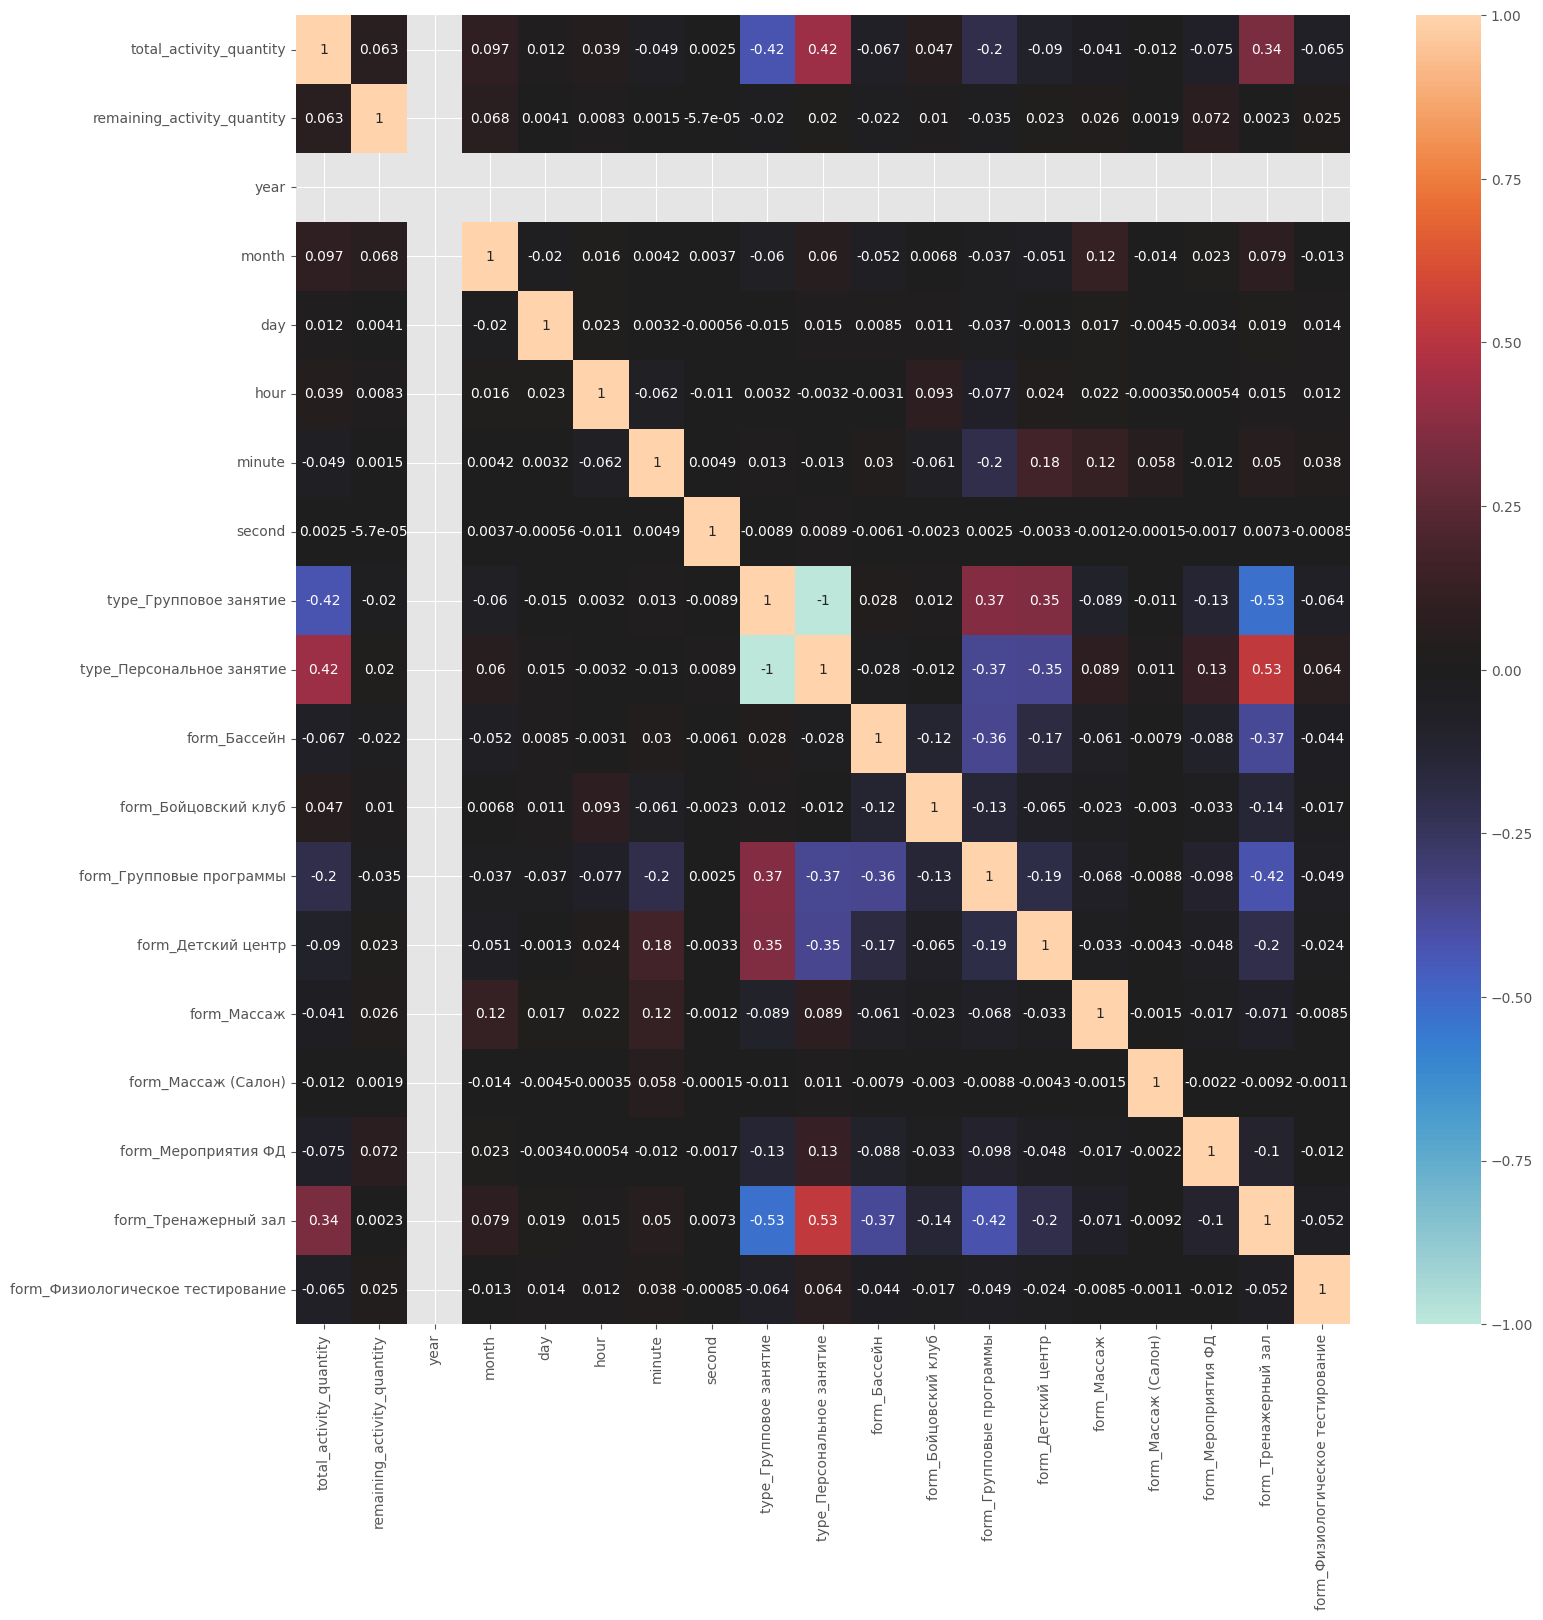

In [58]:
plt.figure(figsize=(17, 17))
sns.heatmap(activityFrame.drop('id', axis=1).corr(), center=0, annot=True)

In [59]:
activityFrame = activityFrame.drop('type_Групповое занятие', axis=1)

## А что осталось?

На данный момент в списке задач, связанных с подготовкой данных, остались следующие задачи:
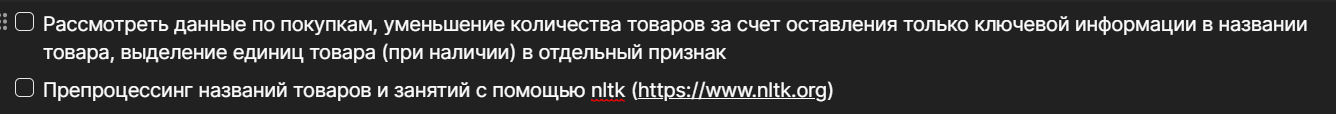
В имеющихся данных самое близкое к "Данным о покупках" - данные из *Activity* (ну и из *Purchase* тоже, ведь мы выявили, что они одинаковы). Я так понимаю, что "Товары" - это активности. Однако, посмотрев на данные я понял, что количество товаров сильно не уменьшишь - в формах активности и так содержится только ключевая информация.
Теперь к препроцессингу названий товаров и занятий с помощью NLTK. NLTK используется (ну, судя по названию и документации) для обработки текста, напечатанного человеком. Проблема в том, что оценив данные, я не смог найти, где можно применить NLTK. Предположу, что из-за того, что мой кейс является смесью из двух, произошла ошибка либо в списке задач, либо в данных, которые были прикреплены к моему кейсу.

## Финальный штрих

После подготовки данных единственное, что осталось сделать - сохранить данные. Это и сделаем. Раз уж файла с данными было три, то три и сохраним.

In [60]:
demographicsFrame.to_csv("./Data/Results/fourth_case_demographics_prepared.csv")
activityFrame.to_csv("./Data/Results/fourth_case_activity_prepared.csv")
activityFrame.to_csv("./Data/Results/fourth_case_purchase_prepared.csv")